The goal of data fitting is to find a mathematical model, or an approximate model, of some relation, **given some observed data**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import petroleum_consumption_data, vehicle_miles_data, house_sales_data, temperature_data

# 13.1 Least squares data fitting

- we believe a scalar $y$ and an n-vector $x$ are related by model

$$ y \approx f(x)$$

- $x$ might represent a set of n feature values, and is called the *feature vector* or the vector of *independent variables*, depending on the context
- y is called the *outcome* or *response variable* that we are interested in
-  $f : \mathbb{R}^n \rightarrow \mathbb{R}$ gives the relation between $x$ and $y$
- we don't know $f$ , which gives the 'true' relationship between $x$ and $y$

## Data

- we are given some data
$$
x^{(1)}, \ldots, x^{(N)}, \ y^{(1)}, \ldots, y^{(N)}
$$
also called *observations*, *examples*, *samples*, or *measurements*

- $x^{(i)}$, $y^{(i)} is ith *data pair*

- $x^{(i)}_j$ is the value of jth feature for example i

## Model

- $\hat{f} : \mathbb{R}^n \rightarrow \mathbb{R}$ is an approximation of the function $f$
$$
y \approx \hat{f}(x)
$$
- $\hat{f}$ is called the *model*, *prediction function*, or *predictor*
- $\hat{y} = \hat{f}(x)$, where $\hat{y}$ is the (scalar) *prediction* (of the outcome $y$), given the *independent variable* (vector) $x$

## Linear in the parameters model

$$
\hat{f}(x) = \theta_1 f_1(x) + \cdots + \theta_p f_p(x)
$$

- $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ are *basis functions* or *feature mappings* that we choose
- $θ_i$ are model parameters that we choose
- *linear in the parameters*: for each $x$, $\hat{f}(x)$ is a linear function of the model parameter p-vector $\theta$

## Prediction error

*prediction error* or *residual* for ith data point is
$$
r^{(i)} = y^{(i)} − \hat{y}^{(i)}
$$

## Vector notation for outcomes, predictions, and residuals

$$
y^d = (y^{(1)}, \ldots, y^{(N)}), \quad \hat{y}^d = (\hat{y}^{(1)}, \ldots, \hat{y}^{(N)}), \quad r^d = (r^{(1)}, \ldots, r^{(N)}) = y^d - \hat{y}^d
$$

With the superscript d (for 'data'), $y^d$, $\hat{y}^d$, and $r^d$ refer to the N-vectors of observed data values, predicted values, and associated residuals.

---

How to measure the model is "good"
- RMS prediction error **rms**($r^d$)
- The ratio **rms**($r^d$)/**rms**($y^d$) gives a relative prediction error \
    For example, if the relative prediction error is 0.1, we might say that the model predicts the outcomes, or fits the data, within 10%.

## Least squares data fitting

- define N × p matrix $A$ with elements $A_{ij} = \hat{f}_j(x^{(i)})$, so $\hat{y}^d = A\theta$
- choose $\theta$ to minimize

$$
\|r^d\|^2 = \|y^d - \hat{y}^d\|^2 = \|y^2 - A\theta\|^2 = \|A\theta - y^2\|^2
$$

- $\hat{\theta} = (A^TA)^{−1}A^Ty^d = A^{\dagger}y^d$  (if columns of $A$ are **linearly independent**)
- $\|y^d − A\hat{\theta}\|^2$ is called the *minimum sum square error* (for the given model basis and data set)
- $\|y^d − A\hat{\theta}\|^2 / N$ is called *minimum mean-square (fitting) error*
- $\sqrt{\|y^d − A\hat{\theta}\|^2 / N}$ is called *minimum RMS error*

## Least squares fit with a constant

- simplest possible model: $p = 1$, $f_1(x) = 1$, so model $\hat{f}(x) = \theta_{1}$ is a constant
- $A = \mathbf{1}$, so

$$
\hat{\theta}_1 = (A^TA)^{-1} A^T y^d = (\mathbf{1}^T \mathbf{1})^{-1} \mathbf{1}^T y^d = (1/N) \mathbf{1} y^d = \mathbf{avg}(y^d)= \hat{f}(x)
$$

- the mean of $y^{(1)}, \ldots, y^{(N)}$ is the least squares fit by a constant

- MMSE is $std(y^d)^2$; RMS error is $std(y^d)$

- more sophisticated models are judged against the constant model

In [2]:
y = np.random.randn(*(5, 1))
A = np.ones((5, 1))

print(np.linalg.inv(A.T @ A) @ A.T)
print(np.linalg.inv(A.T @ A) @ A.T @ y)
print(np.mean(y))

[[0.2 0.2 0.2 0.2 0.2]]
[[-0.52488499]]
-0.5248849921692924


## Fitting univariate functions

- when $n = 1$, we seek to approximate a function $f : \mathbb{R} \rightarrow \mathbb{R}$
- we can plot the data $(x_i, y_i)$ and the model function $\hat{y} = \hat{f}(x)$

## Straight-line fit

- p = 2, with basis function $f_1(x) = 1$, $f_2(x) = x$
- model has form $\hat{f}(x) = \theta_1 + \theta_2 x$
- matrix A has form
$$
A = 
\begin{bmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
\vdots & \vdots \\
1 & x^{(N)}
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{1} & x^d
\end{bmatrix}
$$

---
Derive the solution
$$
\begin{align}
\begin{bmatrix}
\hat{\theta}_1 \\ \hat{\theta}_2
\end{bmatrix}
&= (A^T A)^{-1} A^T y^d \\
&= 
\begin{bmatrix}
N & \mathbf{1}^T x^d \\
\mathbf{1}^T x^d & (x^d)^T x^d
\end{bmatrix}
\begin{bmatrix}
\mathbf{1}^T y^d \\
(x^d)^T y^d
\end{bmatrix} \\
&=
\frac{1}{N(x^d)^T x^d - (\mathbf{1}^T x^d)^2}
\begin{bmatrix}
(x^d)^T x^d & -\mathbf{1}^T x^d \\
-\mathbf{1}^T x^d & N
\end{bmatrix}
\begin{bmatrix}
\mathbf{1}^T y^d \\
(x^d)^T y^d
\end{bmatrix} \qquad \text{using the formula for the inverse of a 2 × 2 matrix} \\
&=
\frac{N^2}{N(x^d)^T x^d - (\mathbf{1}^T x^d)^2}
\begin{bmatrix}
(x^d)^T x^d / N & -\mathbf{1}^T x^d / N \\
-\mathbf{1}^T x^d / N & N / N
\end{bmatrix}
\begin{bmatrix}
\mathbf{1}^T y^d / N\\
(x^d)^T y^d / N
\end{bmatrix} \\
&=
\frac{1}{\mathbf{rms}(x^d)^2 - \mathbf{avg}(x^d)^2}
\begin{bmatrix}
\mathbf{rms}(x^d)^2 & -\mathbf{avg}(x^d) \\
-\mathbf{avg}(x^d) & 1
\end{bmatrix}
\begin{bmatrix}
\mathbf{avg}(y^d)\\
(x^d)^T y^d / N
\end{bmatrix} \\
\end{align}
$$

The optimal slope $\hat{\theta}_2$ of the straight line fit can be expressed more simply in terms of
the correlation coefficient $\rho$ between the data vectors $x^d$ and $y^d$, and their standard deviations.

$$
\begin{align}
\hat{\theta}_2 
&= 
\frac{N(x^d)^T y^d − (\mathbf{1}^T x^d)(\mathbf{1}^T y^d)}{N(x^d)^T x^d - (\mathbf{1}^T x^d)^2} \\
&= 
\frac{N(x^d)^T y^d − (\mathbf{1}^T x^d)(\mathbf{1}^T y^d) - (\mathbf{1}^T x^d)(\mathbf{1}^T y^d)+ (\mathbf{1}^T x^d)(\mathbf{1}^T y^d)}{N(x^d)^T x^d - 2(\mathbf{1}^T x^d)(\mathbf{1}^T x^d) + (\mathbf{1}^T x^d)(\mathbf{1}^T x^d)} \\
&= 
\frac{(x^d)^T y^d − (\mathbf{avg}(x^d)\mathbf{1})^T y^d - (x^d)^T(\mathbf{avg}(y^d)\mathbf{1}) + N\mathbf{avg}(x^d)\mathbf{avg}(y^d)}{(x^d)^T x^d - 2 (x^d)^T(\mathbf{avg}(x^d)\mathbf{1}) + N\mathbf{avg}(x^d)\mathbf{avg}(x^d)} \\
&=
\frac{(x^d)^T y^d − (\mathbf{avg}(x^d)\mathbf{1})^T y^d - (x^d)^T(\mathbf{avg}(y^d)\mathbf{1}) + \mathbf{avg}(x^d)\mathbf{avg}(y^d) (\mathbf{1}^T\mathbf{1})}{(x^d)^T x^d - 2 (x^d)^T(\mathbf{avg}(x^d)\mathbf{1}) + \mathbf{avg}(x^d)\mathbf{avg}(x^d) (\mathbf{1}^T\mathbf{1})} \\
&=
\frac{(x^d)^T y^d − (\mathbf{avg}(x^d)\mathbf{1})^T y^d - (x^d)^T(\mathbf{avg}(y^d)\mathbf{1}) + (\mathbf{avg}(x^d)\mathbf{1})^T(\mathbf{avg}(y^d)\mathbf{1})}{(x^d)^T x^d - 2 (x^d)^T(\mathbf{avg}(x^d)\mathbf{1}) + (\mathbf{avg}(x^d)\mathbf{1})^T(\mathbf{avg}(x^d)\mathbf{1})} \\
&=
\frac{(x^d − \mathbf{avg}(x^d)\mathbf{1})^T (y^d - \mathbf{avg}(y^d)\mathbf{1})}{\|x^d − \mathbf{avg}(x^d)\mathbf{1}\|^2} \\
&=
\frac{(x^d − \mathbf{avg}(x^d)\mathbf{1})^T (y^d - \mathbf{avg}(y^d)\mathbf{1})}{N \frac{\|x^d − \mathbf{avg}(x^d)\mathbf{1}\|}{\sqrt{N}} \frac{\|x^d − \mathbf{avg}(x^d)\mathbf{1}\|}{\sqrt{N}}} \\
&=
\frac{(x^d − \mathbf{avg}(x^d)\mathbf{1})^T (y^d - \mathbf{avg}(y^d)\mathbf{1})}{N \mathbf{std}(x^d) \mathbf{std}(x^d)} \\
&=
\frac{\mathbf{std}(y^d)}{\mathbf{std}(x^d)}
\frac{(x^d − \mathbf{avg}(x^d)\mathbf{1})^T (y^d - \mathbf{avg}(y^d)\mathbf{1})}{N \mathbf{std}(x^d) \mathbf{std}(y^d)} \\
&=
\frac{\mathbf{std}(y^d)}{\mathbf{std}(x^d)} \rho
\end{align}
$$

From $N\theta_1 + (\mathbf{1}^T x^d)\theta_2 = \mathbf{1}^T y^d$, we obtain $\hat{\theta}_1$
$$
\hat{\theta}_1 = \mathbf{avg}(y^d) - \hat{\theta}_2 \mathbf{avg}(x^d)
$$

Putting these results together, we can write the least squares fit as
$$
\begin{align}
\hat{f}(x) &= \hat{\theta}_1 + \hat{\theta}_2 x \\
& = \mathbf{avg}(y^d) - \rho \frac{\mathbf{std}(y^d)}{\mathbf{std}(x^d)} \mathbf{avg}(x^d) + \rho \frac{\mathbf{std}(y^d)}{\mathbf{std}(x^d)} x\\
&=
\mathbf{avg}(y^d) + \rho \frac{\mathbf{std}(y^d)}{\mathbf{std}(x^d)} (x - \mathbf{avg}(x^d))\\
\end{align}
$$

In [3]:
consumption = petroleum_consumption_data()
print(consumption)
n = len(consumption)  # 34
A = np.column_stack((np.ones(n), np.arange(1, n+1)))
# print(A)
x = np.linalg.lstsq(A, consumption)[0]
print(x)

[63122 60953 59551 58785 59795 60083 61819 63107 64978 66090 66541 67186
 67396 67619 69006 70258 71880 73597 74274 75975 76928 77732 78457 80089
 83063 84558 85566 86724 86046 84972 88157 89105 90340 91195]
[55604.93048128  1032.57035905]


D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


- $\hat{y}(i) = \hat{\theta}_1 + \hat{\theta}_2 i$, $i = 1, \ldots, N$, is called trend line
- $\hat{\theta}_2$ is *trend coefficient*

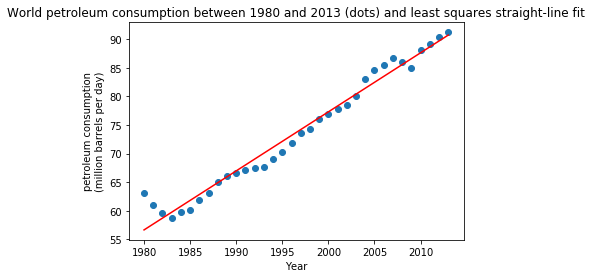

In [4]:
plt.scatter(np.arange(1980, 2014), consumption / 1e3)
plt.plot(np.arange(1980, 2014), A @ x / 1e3, 'r')
plt.xlabel('Year')
plt.ylabel('petroleum consumption\n(million barrels per day)')
plt.title('World petroleum consumption between 1980 and 2013 (dots) and least squares straight-line fit')
plt.show()

- $y^d − \hat{y}^d$ is called *de-trended time series*

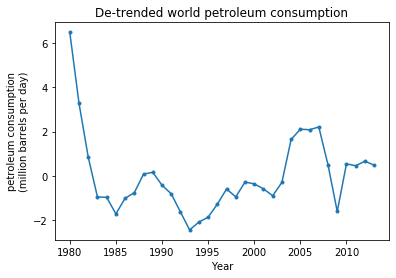

In [5]:
plt.plot(np.arange(1980, 2014), (consumption - A @ x) / 1e3, '.-')
plt.xlabel('Year')
plt.ylabel('petroleum consumption\n(million barrels per day)')
plt.title('De-trended world petroleum consumption')
plt.show()

## Estimation of trend and seasonal component

- previous example: $y^d \approx \hat{y}^d = \hat{y}^{const} + \hat{y}^{lin}$

$$\hat{y}^{const} = \theta_1 \mathbf{1}, \quad
\hat{y}^{lin} = \theta_2 \begin{bmatrix} 1 \\ 2 \\ \vdots \\ N \end{bmatrix}$$

- extimate periodic component: $y^d \approx \hat{y}^d = \hat{y}^{lin} + \hat{y}^{seas}$
$$
\hat{y}^{lin} = \theta_1 \begin{bmatrix} 1 \\ 2 \\ \vdots \\ N \end{bmatrix}, \quad
\hat{y}^{seas} = \begin{bmatrix} \theta_{2:(P+1)} \\ \theta_{2:(P+1)} \\ \vdots \\ \theta_{2:(P+1)} \end{bmatrix} \qquad
\text{(we assume N is a multiple of P)}
$$
    The second component is *periodic* or *seasonal*, with period P

In [6]:
vmt = vehicle_miles_data()
print(vmt.shape)

(15, 12)


In [7]:
m = 15 * 12
A = np.column_stack((np.arange(m), np.vstack([np.identity(12) for i in range(15)])))
b = np.reshape(vmt, (m, 1))
x = np.linalg.lstsq(A, b)[0]
print(A.shape)
print(b.shape)

(180, 13)
(180, 1)


D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [8]:
b[0:15]

array([[203442],
       [199261],
       [232490],
       [227698],
       [242501],
       [242963],
       [245140],
       [247832],
       [227899],
       [236491],
       [222819],
       [218390],
       [209685],
       [200876],
       [232587]])

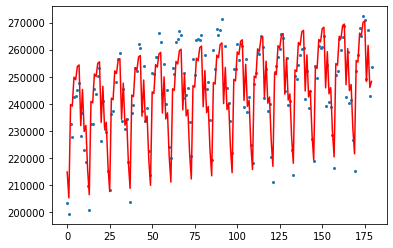

In [9]:
plt.scatter(np.arange(m), b, s=4)
plt.plot(np.arange(m), A @ x, 'r', lw=1.5)
plt.show()

## Polynomial fit

- $f_i(x) = x^{i−1}$, $i = 1, \ldots, p$
- model is a polynomial of degree less than p
$$
\hat{f}(x) = \theta_1 + \theta_2 x + \cdots + \theta_p x^{p-1}
$$
    (here $x^i$ means scalar x to ith power; $x^{(i)}$ is ith data point)
- $A$ is Vandermonde matrix
$$
A = \begin{bmatrix}
1 & x^{(1)} & \cdots & (x^{(1)})^{p-1} \\
1 & x^{(2)} & \cdots & (x^{(2)})^{p-1} \\
\vdots & \vdots &  & \vdots \\
1 & x^{(N)} & \cdots & (x^{(N)})^{p-1}
\end{bmatrix}
$$

In [10]:
#Generate training data in the interval [-1,1]
m = 100
t = -1 + 2*np.random.random(m)
y = np.power(t, 3) - t + 0.4 / (1 + 25*np.power(t, 2)) + 0.10*np.random.normal(size=m)
print(t.shape)
print(y.shape)

(100,)
(100,)


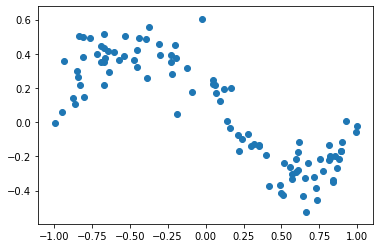

In [11]:
plt.scatter(t, y)
plt.show()

In [12]:
polyfit = lambda t,y,p: np.linalg.lstsq(np.fliplr(np.vander(t, p)), y)[0]
theta2 = polyfit(t, y, 3)
theta6 = polyfit(t, y, 7)
theta10 = polyfit(t, y, 11)
theta15 = polyfit(t, y, 16)

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


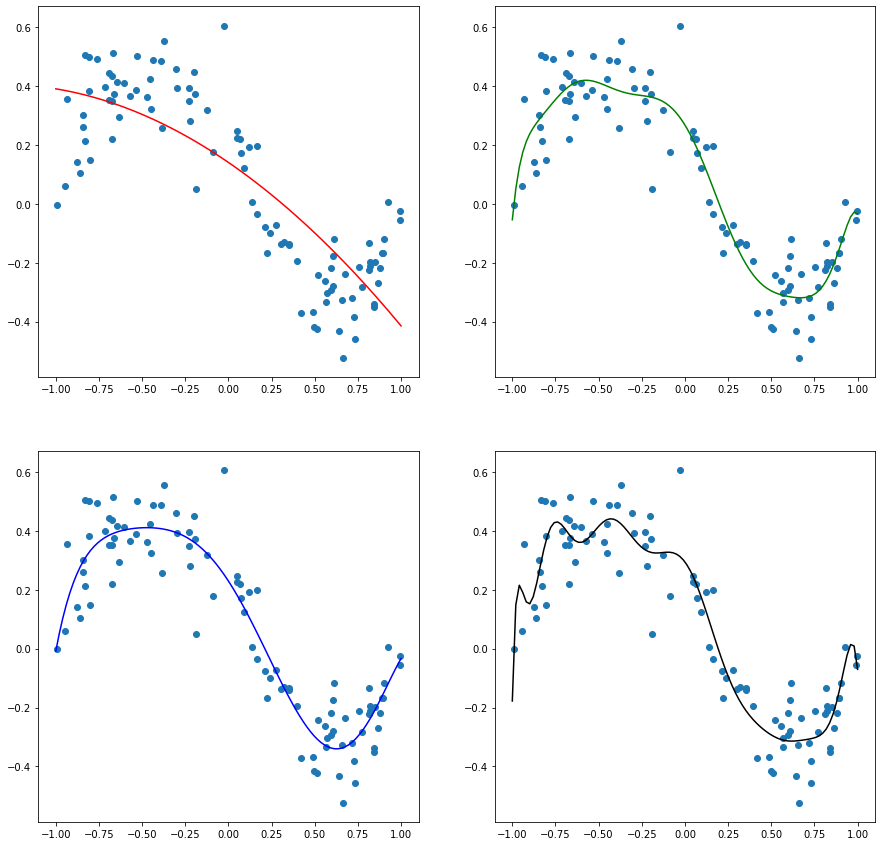

In [13]:
polyeval = lambda theta,x: np.fliplr(np.vander(x, len(theta))) @ theta
t_plot = np.linspace(-1, 1, num=100)

fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0, 0].scatter(t, y)
ax[0, 0].plot(t_plot, polyeval(theta2, t_plot), 'r') 
ax[1, 0].scatter(t, y)
ax[1, 0].plot(t_plot, polyeval(theta6, t_plot), 'b') 
ax[0, 1].scatter(t, y)
ax[0, 1].plot(t_plot, polyeval(theta10, t_plot), 'g') 
ax[1, 1].scatter(t, y)
ax[1, 1].plot(t_plot, polyeval(theta15, t_plot), 'k') 
plt.show()

## Piecewise-linear fit

In [14]:
# Generate random data
m = 100
x = -2 + 4*np.random.random(m)
y = 1 + 2*(x-1) - 3*np.maximum(x+1,0) + 4*np.maximum(x-1, 0) + 0.3*np.random.normal(size=m)
print(x.shape)
print(y.shape)

(100,)
(100,)


In [15]:
# least square fitting
theta = np.linalg.lstsq(
    np.column_stack((np.ones(m), x, np.maximum(x + 1, 0), np.maximum(x-1, 0))), y
)[0]

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


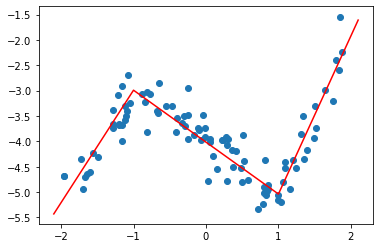

In [16]:
# plot result
t = np.array([-2.1, -1, 1, 2.1])
yhat = theta[0] + theta[1]*t + theta[2]*np.maximum(t+1,0) + theta[3]*np.maximum(t-1,0)
plt.scatter(x, y)
plt.plot(t, yhat, 'r')
plt.show()

## Regression as general data fitting

- regression model is **affine function** $\hat{y} = \hat{f}(x) = x^T \beta + v$
- fits general fitting form with basis functions
$$
f_1(x) = 1,\ f_i(x) = x_{i−1},\ i = 2, \ldots , n + 1
$$
    so model is
$$
\hat{y} = \theta_1  + \theta_2 x_1 + \cdots + \theta_{n-1} x_n = x^T \theta_{2:n}  + \theta_1
$$

- $\beta = \theta_{2:n}$, $v = \theta_1$

- N × (n + 1) matrix $A$ in our general data fitting form is given by
$$
A = \begin{bmatrix} \mathbf{1} & X^T \end{bmatrix}
$$
    $X$ is the feature matrix with columns $x^{(1)}, \ldots, x^{(N)}$

- regression model is a special case of our general linear in the parameters model

## General fitting model as regression

- general fitting model $\hat{f}(x) = \theta_1 f_1(x) + \cdots+ \theta_p f_p(x)$
- common assumption: $f_1(x) = 1$
- same as regression model $\hat{f} (\hat{x}) = \tilde{x}^T \beta + v$, with
    - $\tilde{x} = (f_2(x), \ldots, f_p(x))$  are 'transformed features' vector
    - $v = \theta_1$, $\beta = \theta_{2:p}$
- general linear in the parameters model as nothing more than simple regression, but applied to the *transformed*, *mapped*, or *generated* features $f_1(x), \ldots, f_p(x)$.

## House price regression

In [17]:
D = house_sales_data()
area = D["area"]
beds = D["beds"]
price = D["price"]
m = len(price)
A = np.column_stack((np.ones(m), area, beds))
x = np.linalg.lstsq(A, price, rcond=None)[0]
print('x:', x)
rms_error = (sum((price - A @ x)**2)/len(price))**0.5
std_price = np.std(price)
print('rms:', rms_error)
print('std:', std_price)

x: [ 54.4016736  148.7250726  -18.85335788]
rms: 74.84571649590141
std: 112.78216159756509


## Auto-regressive time series model

- Suppose that $z_1, z_2, \ldots$  is a time series.
- An *auto-regressive model* (also called *AR model*) for the time series has the form
$$
\hat{z}_{t+1} = \theta_1 z_t + \cdots + \theta_M z_{t−M+1}, \ t = M, M + 1, \ldots
$$
- $M$ is the *memory* or *lag* of the model
- \hat{z}_{t+1} is prediction of next value, based on previous M values
- we’ll choose $\beta$ to minimize sum of squares of prediction errors,
$$
(\hat{z}_{M+1} − z_{M+1})^2 +  + (\hat{z}_T − z_T)^2, \ (observed data z_1, \ldots, z_T)
$$
- put in general form with
$$
y^{(i)} = z_{M+i}, \ x^{(i)} = (z_{M+i−1}, \ldots, z_i), \ i = 1, \ldots, T − M
$$
    We have $N = T − M$ examples, and $n = M$ features.

In [18]:
# import time series of temperatures t
t = temperature_data()
N = len(t)
# Standard deviation
print('N:', N)
print('std(t):', np.std(t))

N: 744
std(t): 3.0505592856293298


In [19]:
# RMS error for simple predictor zhat_{t+1} = z_t
(sum((t[1:] - t[:-1])**2)/(N-1))**0.5

1.1602431638206123

In [20]:
# RMS error for simple predictor zhat_{t+1} = z_{t-23}
(sum((t[24:] - t[:-24])**2)/(N-24))**0.5

1.733894140046875

In [21]:
# Least squares fit of AR predictor with memory 8
M = 8
y = t[M:]
A = np.column_stack([t[i:i+N-M] for i in reversed(range(M))])
print('shape of A:', A.shape)
print('A:', A)

shape of A: (736, 8)
A: [[60.1 57.  57.  ... 57.  57.9 59. ]
 [62.1 60.1 57.  ... 57.  57.  57.9]
 [64.  62.1 60.1 ... 55.9 57.  57. ]
 ...
 [62.1 62.1 62.1 ... 66.  68.  68. ]
 [62.1 62.1 62.1 ... 64.9 66.  68. ]
 [62.1 62.1 62.1 ... 63.  64.9 66. ]]


In [22]:
theta = np.linalg.lstsq(A, y, rcond=None)[0]
ypred = A @ theta
# RMS error of LS AR fit
(sum((ypred-y)**2)/len(y))**0.5

1.0129632612687514

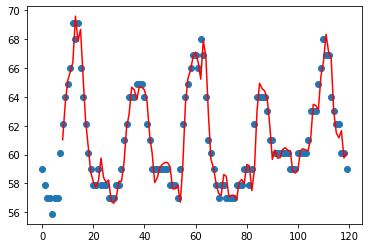

In [23]:
# Plot first five days
Nplot = 24*5
plt.scatter(np.arange(Nplot), t[0:Nplot])
plt.plot(np.arange(M,Nplot), ypred[:Nplot-M], 'r')
plt.show()

# 13.2 Validation

## Generalization

basic idea:
- goal of model is *not* to predict outcome for the given data
- instead it is to predict the outcome on *new*, *unseen* data
---
- a model predicts the outcomes for *new unseen data* values as well, or nearly as well, as it predicts the outcomes on the data used to form the model, it is said to have good *generalization ability*, or *generalizes*.
- a model that makes good predictions on the data used to form the model, but make poor predictions on new, unseen data is said to suffer from *over-fit*

## Validation

a simple and effective method to guess if a model will generalize
- split original data into a training set and a test set (or training set, validation set, test set)
- typical splits: 80%/20%, 90%/10% (60%/20%/20%, big data: 98%/1%/1% or 99.5%/0.25%/0.25%)
- build ('train') model on training data set
- then check the model’s predictions on the test data set
- (can also compare RMS prediction error on train and test data)
- if they are similar, we can *guess* the model will generalize
- can be used to choose among different candidate models
- we'd use one with low, or lowest, test error

## Example: Polynomial approximation

In [24]:
m = 100
# Generate the test set.
t = -1 + 2*np.random.random(m)
y = np.power(t,3) - t + 0.4 / (1 + 25*np.power(t,2)) + 0.10*np.random.normal(size = m)
t_test = -1 + 2*np.random.random(m)
y_test = np.power(t_test,3) - t_test + 0.4/(1 + np.power(25*t_test,2)) + 0.10*np.random.normal(size = m)
error_train = np.zeros(21)
error_test = np.zeros(21)

for p in range(1, 22):
    A = np.vander(t, p, increasing=True)
    theta = np.linalg.lstsq(A, y, rcond=None)[0]
    error_train[p-1] = np.linalg.norm(A @ theta - y)/np.linalg.norm(y)
    
    A_test = np.vander(t_test, p, increasing=True)
    error_test[p-1] = np.linalg.norm(A_test @ theta - y_test)/np.linalg.norm(y_test)

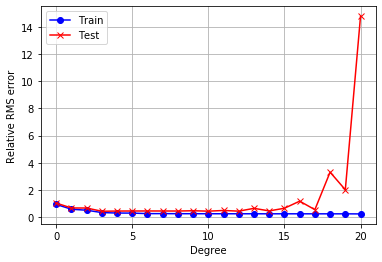

In [25]:
plt.plot(np.arange(21), error_train, 'b-o', label='Train')
plt.plot(np.arange(21), error_test, 'r-x', label='Test')
plt.xlabel('Degree')
plt.ylabel('Relative RMS error')
plt.xticks(np.arange(0, 21, 5))
plt.legend()
plt.grid()
plt.show()

## Cross validation

concept:
- cross-validation does not check a particular model, since it creates $n$ different (but hopefully not very different) models
-  Cross-validation checks a selection of basis functions

---
to carry out cross validation:
- divide data into 10 (5) folds
- for $i = 1, \ldots,10$, build (train) model using all folds except $i$
- test model on data in fold i

---
interpreting cross validation results:
- if test RMS errors are much larger than train RMS errors, model is over-fit
- if test and train RMS errors are similar and consistent, we can guess the model will have a similar RMS error on future data

---
select model:
- use the parameters obtained by fitting a model over all the data
- use the average of the model parameters from the different folds

## Example: House price regression model

In [26]:
# Get data
D = house_sales_data()
price = D['price']
area = D['area']
beds = D['beds']

In [27]:
# set up variables for k-fold validation
N = len(price)
X = np.column_stack([np.ones(N), area, beds])
I = np.array_split(np.random.permutation(N), 5)
nfold = np.floor(N/5)  # size of first four folds
coeff = np.zeros((5, 3))
rms_train = np.zeros(5)
rms_test = np.zeros(5)

In [28]:
for k in range(5):
    Itest = I[k]
    Itrain = np.concatenate((np.delete(I, k)))
    Ntrain = len(Itrain)
    Ntest = len(Itest)
    theta = np.linalg.lstsq(X[Itrain], price[Itrain], rcond=None)[0]
    coeff[k,:] = theta
    rms_train[k] = (sum((X[Itrain] @ theta - price[Itrain])**2) / Ntrain)**0.5
    rms_test[k] = (sum((X[Itest] @ theta - price[Itest])**2) / Ntest)**0.5


# 3 coefficients for the five folds
print(coeff)

[[ 50.06029017 147.46907152 -17.42254918]
 [ 57.87874808 145.65939393 -18.64117232]
 [ 63.02653239 152.84964121 -23.19466542]
 [ 51.64285227 149.091211   -18.66201826]
 [ 49.26468024 148.81378833 -16.45962257]]


In [29]:
# RMS errors for five folds
print(np.column_stack((rms_train, rms_test)))

[[73.60724331 79.71104848]
 [75.37951513 72.80626631]
 [77.17500815 65.00074796]
 [72.42946274 83.87963796]
 [75.35500389 73.15957394]]


## Example: Validating time series predictions

In [30]:
# import time series of temperatures t
t = temperature_data()
N = len(t)

# use first 24 days as training set, 7 days as test set
Ntrain = 24*24
t_train = t[:Ntrain]
Ntest = N-Ntrain
t_test = t[Ntrain:]

# Least squares fit of AR predictor with memory 8
M = 8
m = Ntrain - M
y = t_train[M:M+m]
A = np.column_stack([t[i:i+m] for i in reversed(range(M))])
coeff = np.linalg.lstsq(A, y, rcond=None)[0]
rms_train = (sum((A @ coeff-y)**2)/len(y))**0.5

print(rms_train)

1.0253577259862323


In [31]:
ytest = t_test[M:]
mtest = len(ytest)
ypred = np.column_stack([t_test[i:i+mtest] for i in reversed(range(M))]) @ coeff
rms_test = (sum((ypred-ytest)**2)/len(ytest))**0.5
print(rms_test)

0.975511363220097


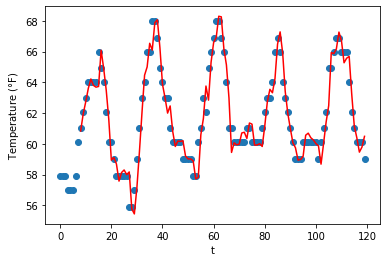

In [32]:
plt.ion()
Nplot = 24*5
plt.scatter(np.arange(Nplot), t_test[np.arange(Nplot)])
plt.plot(np.arange(M,Nplot), ypred[np.arange(Nplot-M)], 'r')
plt.xlabel('t')
plt.ylabel('Temperature ($\degree$F)')
plt.show()

# 13.3 Feature engineering

- start with original or base feature n-vector $x$
- choose basis functions $f_1, \ldots,f_p$ to create 'mapped' feature p-vector (p > n: adding new features, p < n: dimension reduction)
$$ (f_1(x), \ldots, f_p(x)) $$
- now fit linear in parameters model with mapped features
$$ \hat{y} = \theta_1f_1(x) + \cdots + \theta_pf_p(x) $$
- check the model using validation

## Example: House price prediction

In [34]:
D = house_sales_data()
price = D['price']
area = D['area']
beds = D['beds']
condo = D['condo']
location = D['location']
N = len(price)

# feature engineering
X = np.column_stack([np.ones(N), area, np.maximum(area-1.5, 0), beds, condo, location==2, location==3, location==4])

theta = np.linalg.lstsq(X, price, rcond=None)[0]
theta

array([ 115.61682367,  175.41314064,  -42.74776797,  -17.87835524,
        -19.04472565, -100.91050309, -108.79112222,  -24.76524735])

In [35]:
# RMS prediction error
(sum((X @ theta - price)**2)/N)**0.5

68.34428699036883

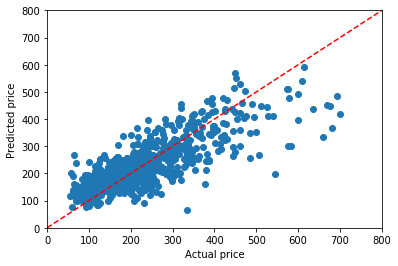

In [36]:
plt.ion()
plt.scatter(price, X @ theta)
plt.plot([0, 800], [0,800], 'r--')
plt.ylim(0, 800)
plt.xlim(0, 800)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [37]:
# cross validation
I = np.array_split(np.random.permutation(N), 5)
nfold = np.floor(N/5)
# store 8 coefficients for the 5 models
models = np.zeros((5, 8))
rms_train = np.zeros(5)
rms_test = np.zeros(5)

for k in range(5):
    Itest = I[k]
    Itrain = np.concatenate((np.delete(I, k)))
    Ntrain = len(Itrain)
    Ntest = len(Itest)
    theta = np.linalg.lstsq(X[Itrain], price[Itrain], rcond=None)[0]
    models[k, :] = theta
    rms_train[k] = (sum((X[Itrain] @ theta - price[Itrain])**2)/Ntrain)**0.5
    rms_test[k] = (sum((X[Itest] @ theta - price[Itest])**2)/Ntest)**0.5

# display the 8 coefficients for each of the 5 folds
models

array([[ 116.50346117,  176.77083947,  -38.49153546,  -20.71898863,
         -22.25827884,  -98.1466786 , -102.1293411 ,  -19.96135797],
       [ 108.99609236,  175.67943093,  -39.07640782,  -19.49916901,
         -25.76289716,  -90.58173853,  -98.26203623,  -16.21255794],
       [ 132.03796816,  173.23399991,  -39.28649568,  -16.25948826,
         -12.08960262, -117.89415941, -128.07788888,  -44.76503248],
       [ 109.19767387,  176.12980788,  -43.80603751,  -17.08927845,
         -18.44067206,  -96.50542577, -105.39702362,  -19.98928409],
       [ 114.16754894,  174.11330119,  -51.87378596,  -16.11079094,
         -17.64341027, -101.86455535, -110.5662863 ,  -22.71567731]])

In [38]:
# display training errors
print(rms_train)
# display testing errors
print(rms_test)

[67.83608147 67.27650348 70.24716457 70.33103117 65.47766037]
[70.67909812 72.72095617 60.86470364 59.84046296 79.56705383]
